Groupe : Gauillaume ROBERT, Mehdi SANSAL, Maxime NEUVILLE

04/07/2019

<h1><center>Projet Data</center></h1>


<h2>Sommaire</h2>

1. [Introduction](#Introduction)<br>
2. [Contexte](#Contexte)<br>
3. [VRP : Problème du voyageur de commerce](#VRP-:-Problème-du-voyageur-de-commerce)<br>
4. [Algorithme heuristique / metaheuristique](#Algorithme-heuristique-/-metaheuristique)<br>
5. [Réalisation](#Réalisation)<br>
    a. [Génération aléatoire d'un graphe](#Génération-aléatoire-d'un-graphe)<br>
    b. [Algorithme du plus court chemin](#Algorithme-du-plus-court-chemin)<br>
    c. [Algorithme du plus court chemin, avec deux contraintes](#Algorithme-du-plus-court-chemin,-avec-deux-contraintes)<br>
    d. [Combinaison des deux](#Combinaison-des-deux)<br>
6. [Statistique](#Statistique)<br>
    a. [Comparaison des moyennes de poids total et de temps d'execution](#Comparaison-des-moyennes-de-poids-total-et-de-temps-d'execution)<br>
    b. [Regression Linéaire](#Regression-Linéaire)
7. [Conclusion](#Conclusion)

<h2>Introduction</h2>

<div style="text-align: justify">
La réduction de la consommation d'énergie est devenue un objectif important des pays énergivores vers la fin du XXe siècle. Ces pays en ont pris conscience après le <a href="https://fr.wikipedia.org/wiki/Premier_choc_p%C3%A9trolier">choc pétrolier de 1973</a> qui fait référence à la pénurie de pétrole qu'ont connue les Etats Unies. Puis plus récemment, dans les années 90, avec les premières études sur le réchauffement climatique du GIEC (groupe d'experts intergouvernemental sur l'évolution du climat) qui établit une augmentation non naturelle de la température.
<br>
Ce n'est qu'après 6ans de travaux menés par 2500 scientifiques que le GIEC a établi la responsabilité humaine du rechauffement climatique dans son rapport intitulé "<a href="https://www.ipcc.ch/site/assets/uploads/2018/02/ar4_syr_fr.pdf">Changement climatique 2007 : Les bases scientifiques physiques"</a>. Ce rapport explique pour la première fois que le réchauffement global de la planète est en partie du aux émissions de gaz à effet de serre qui s'est considérablement augmenté depuis le XIXe siècle et la révolution industrielle.
<br>
<img src="https://www.la-viande.fr/sites/default/files/images/environnement-ethique/atlas/chapitres/enjeux-environnementaux-coeur-pratiques-filiere/atlas-c04-p-13-emissions-de-gaz-a-effet-de-serre-par-secteur-en-france.jpg"> 
<p style="text-align : center"><i>Emission de gaz à effet de serre par secteur en France en 2014 (source : Citepa, 2014) </i></p>

D'après ce graphique de Citepa, représentant les émissions de gaz à effet de serre par secteur en France en 2014, nous pouvons remarquer que le secteur du transport est le secteur émettant le plus de gaz.
De ce fait il est question aujourd'hui de réduire l'utilisation des transports, de passer à une énergie plus "propre" ou encore d'optimiser la façon dont nous utilisons nos moyens de locomotion.

</div>

<h2>Contexte</h2>

<div style="text-align: justify">
C'est dans ce contexte d'optimisation de l'utilisation de nos transports qu'intervient notre étude.
Notre but est de générer une tournée de livraison (problème du VRP). Le problème algorithmique consiste donc à calculer sur un réseau routier une tournée permettant de relier entre elles un sous-ensemble de villes, puis de revenir à son point de départ, de manière à minimiser la distance totale parcourue. </div>

3 aspects nous sont demandés :
+ Génération aléatoire de graphique.
+ Algorithme du plus cours chemin optimisé au problème.
+ Statistiques descriptives, voire prédictives, du comportement de l'algorithme, mises en regard avec l’industrie.

<div style="text-align: justify">
En plus d'une solution simple, c'est-à-dire plus court chemin sur x villes, nous devons choisir des contraintes au problème. </div>

Nous avons retenu 2 contraintes :
+ Gestion d'une fenêtre horaire de livraison des villes.
+ Gestion d'une fenêtre horaire de livraison du camion.



<h2>VRP : Problème du voyageur de commerce</h2>

<div style="text-align: justify">
Le problème du voyageur du commerce est un problème d'optimisation qui, parmi une liste de villes et de distance entre chaque ville, va déterminer le plus court chemin.</div>

![cps](https://media1.tenor.com/images/56a813b10c92b01290bec5296e67ef8d/tenor.gif?itemid=11966562 "c'est pas sorcier")

<div style="text-align: justify">
Ce plus court chemin doit passer par chaque ville une seule fois seulement et revenir à la ville de départ.
C'est un problème algorithmique célèbre qui est en recherche perpétuelle et qui est souvent présent en introduction à l'algorithmie car aujourd'hui on ne connaît pas d'algorithme pouvant donner une solution exacte rapidement.</div>

> **Exemple  :** <br>
Prenons une liste de villes A, B, C D distante entre elles suivant le schéma ci-dessous :
![Instance](https://upload.wikimedia.org/wikipedia/commons/thumb/1/19/Tsp_instance.png/181px-Tsp_instance.png "carte")
<br>
Effectuons le chemin ABCDA.
![Dumb](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Tsp_solution_debile.png/185px-Tsp_solution_debile.png "dumb solution")
<br>
Le chemin ABCDA a une longueur de :
[AB]+[BC]+[CD]+[DA] = 4+2+5+3 = 14km
<br>
Alors qu'il existe un chemin plus court pour partir d'A et revenir à A. Ce chemin est ACBDA.
![opt](https://upload.wikimedia.org/wikipedia/commons/thumb/4/44/Tsp_opt.png/186px-Tsp_opt.png "chemin optimisé")
<br>
Si on calcule sa longueur nous avons donc : [AC]+[CB]+[BD]+[DA] = 3+1+2+1 = 7km 
<br>
<br>
Nous voyons donc ici sur un exemple très simple tout l'intérêt de l'optimisation des chemins emprunté lors d'une livraison. C'est pourquoi de nombreux algorithmes sont implémentés et beaucoup de recherches sont faites encore aujourd'hui afin de trouver l'algorithme le plus optimisé possible. 
<br>

Nous allons donc parler de graphe et plus particulièrement de graphe complet. <br>
Un graphe complet est un graphe dont tous les sommets (villes) sont reliés entre eux par un segment (route).

> **Exemple :**<br>
Exemples de graphes complets <br>
![K2](https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/Complete_graph_K2.svg/120px-Complete_graph_K2.svg.png "K2")
![K3](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/Complete_graph_K3.svg/120px-Complete_graph_K3.svg.png "K3")
![K4](https://upload.wikimedia.org/wikipedia/commons/thumb/5/59/Complete_graph_K4.svg/120px-Complete_graph_K4.svg.png "K4")
![K5](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cf/Complete_graph_K5.svg/120px-Complete_graph_K5.svg.png "K5")
![K8](https://upload.wikimedia.org/wikipedia/commons/thumb/7/73/Complete_graph_K8.svg/120px-Complete_graph_K8.svg.png "K8")
![K12](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9b/11-simplex_graph.svg/120px-11-simplex_graph.svg.png "K12")

<h2>Algorithme heuristique / metaheuristique</h2>

Un algorithme heuristique est un algorithme utilisant une méthode de calcul qui fournit rapidement une solution réalisable mais pas forcément optimale ou exacte pour un problème de compléxité difficile.

> **Exemple :** Méthode de Thomson, méthode de Van Breedam, Méthode de Kinderwater...

![heuristic](https://optimization.mccormick.northwestern.edu/images/2/23/Nearestneighbor.gif "heuristic")
<br>
Voici comment fonctionne un algorithme heuristic. Il va essayer toutes les routes en partant du point de départ jusqu'à trouver un chemin le plus court. Il va prendre les arètes les plus courtes à chaque fois, même si cela pourrait lui allonger le chemin final.

Pour ajouter ce côté intelligent aux algorithmes pour qu'ils choisissent le chemin le plus optimisé, les métaheuristiques existent.

Un algorithme métaheuristique est un algorithme itératif qui guide un algorithme heuristique. Des stratégies d’apprentissage sont utilisées pour structurer des renseignements pour trouver des solutions efficaces presque optimales.

> **Exemple :** Algorithme de recuit simulé, algorithme 2-opt, algorithme de la colonie de fourmilles...

![metaheuristic](https://raw.githubusercontent.com/JeromeBau/TravelingTouristProblem/master/ttp_animation.gif "metaheuristic")
<br>
Voici le fonctionnement d'un algorithme métaheuristique, il ne va pas prendre la route la moins longue à chaque fois, il va faire en sorte d'optimiser le trajet pour que la somme totale de la longueur du chemin à la fin soit la moins haute possible.

<h2>Réalisation</h2>

<h3>Génération aléatoire d'un graphe</h3>

Le but de ce problème est d'avoir un algorithme traitant le problème du vrp pour n'importe quel graphe complet. Nous avons donc développer un outil permettant de générer une matrice, nous permettant de représenter ce graphe.

In [1]:
import numpy as np
import random

def random_symmetric_matrix(n):
    n = int(n)
    maxTime = 12 #pondération maximale entre 2 villes

    cost_mat = np.random.randint(low=1, high=maxTime, size=(n, n)) #Création et remplissage moitié de la matrice
    cost_mat += cost_mat.T #Remplissage de l'autre moitié
    np.fill_diagonal(cost_mat, 0) # Diagonale à 0
    return cost_mat

n=4 # Nombre de ville
cost_mat = random_symmetric_matrix(n)
print(cost_mat)

[[ 0 11 13 12]
 [11  0 17  7]
 [13 17  0 12]
 [12  7 12  0]]


Si on représente sous forme graphique la matrice ci dessus voici ce que ça donne :

(-1.1434636565437726,
 1.143463656543773,
 -1.1669224413403514,
 1.166922441340352)

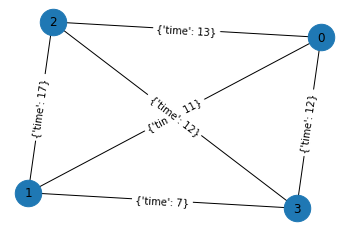

In [3]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge('0', '1', time=cost_mat.item(4))
G.add_edge('0', '2', time=cost_mat.item(8))
G.add_edge('0', '3', time=cost_mat.item(12))
G.add_edge('1', '2', time=cost_mat.item(9))
G.add_edge('1', '3', time=cost_mat.item(13))
G.add_edge('2', '3', time=cost_mat.item(14))


pos = nx.spring_layout(G)

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_edge_labels(G, pos)

# labels
nx.draw_networkx_labels(G, pos)

plt.axis('off')

Nous avons donc un graphe de 4 sommets et 6 arêtes pondérées.

<h3>Algorithme du plus court chemin</h3>

Nous sommes partis dans un premier temps sur un algorithme 2-OPT puisqu'après beaucoup de recherches et comparaison d'algorithmes nous avons trouvé ces tableaux regroupant dans un premier temps poids total trouver pour parcourir le nombre de ville indiqué et dans un second temps le temps d'exécution des algorithmes.<br>

![Comparaison](https://imagizer.imageshack.com/img921/9110/tnDS0r.png "Comparaison")

<h4>Comment fonctionne cet algorithme et à quoi sert-il (2-OPT)?</h4>
<br>

<br>
Tout d'abord, cet algorithme peut fonctionner seulement sur les graphes complets. C'est un algorithme d'optimisation d'un chemin existant. Donc il faut lui donner un chemin où il va ensuite optimiser à chaque itération en décroisant les chemins comme on peut le voir sur l'image ci-après.

![Uncross](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b8/2-opt_wiki.svg/800px-2-opt_wiki.svg.png "Uncross")

Il va essayer toutes les combinaisons possibles pour échanger deux arêtes comme on peut le voir sur l'image ci-dessus. C'est pourquoi il peut être long parfois. Donc, il échange deux arêtes, recalcule le poids total et vérifie s'il a augmenté ou diminué. 
<br>
Nous avons pensé que le 2-OPT était une bonne option pour résoudre le problème posé pour ce projet.
Cependant, après plusieurs tests sur des petits nombres de villes, la précision de cet algorithme ne semblait pas optimale et ne semblait pas répondre correctement à nos souhaits.
<br>
Pour avoir une meilleure précision et polyvalence entre petit nombre de villes et grand nombre, nous avons choisi, toujours en se référant au tableau ci-dessus et à d'autres recherches, d'implémenter un recuit simulé. De plus, cela nous ouvrait la possibilité de faire des statistiques comparatives des deux algorithmes concernant leur temps d'exécution, le poids qu'ils trouvent pour une même matrice donnée et d'autres statistiques qui seront décrites plus bas dans la partie correspondante.
<br> 

<h4>Comment fonctionne cet algorithme et à quoi sert-il (Recuit Simulé) ?</h4>

<br>
Le recuit simulé est une méthode d'optimisation qui utilise l'algorithme Métropolis-Hastings. Cette méthode s'inspire fortement de pratiques issues de la thermodynamique et plus particulièrement de la façon dont les métaux sont chauffés puis refroidis. On parle donc un cycle de chauffage, il maintient sa température puis refroidie de manière contrôlée afin de modifier les caractéristiques du métal. De la même manière on donne une température de base à notre algorithme qui va se refroidir petit à petit grâce à la variable "cooling rate" (refroidissement). Ces deux variables vont influer sur le nombre d'occurrences que l'algorithme fera afin d'arriver à la solution finale. Plus la température de base est élevée, plus l'algorithme effectuera des itérations, de la même manière, plus la valeur du refroidissement et basse, plus il effectuera d'itérations. Donc l'algorithme refroidis au fur et à mesure des itérations et garde en mémoire le poids le plus court qu'il aura rencontré en échangeant deux arêtes. En effet, il faut donner un chemin de base à l'algorithme afin qu'il l'optimise. Son fonctionnement est simple, il échange aléatoirement deux sommets dans le chemin et calcule le poids total afin de voir si le poids total est moins élevé ou non. Sachant que c'est un graphe complet, tous les sommets sont reliés entre eux, cette méthode est donc applicable.

Total iterations : 69
Temps d'execution : 0 s
Plus court chemin :  [0, 2, 1, 3, 0]
Temps pour parcourir le chemin : 49 h


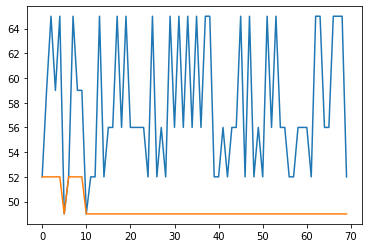

In [4]:
import time 
import copy
import math

# Calculates the travel time for a given path
def path_travel_time(path, matrix):
    time = x = 0

    for i in range(0, len(path)):
        time = time + matrix[x][path[i]]
        x = path[i]

    return time


# Randomly swap 2 elements
def swap_value(path):
    # generates 2 different random values
    v0, v1 = random.sample(range(0, n - 1), 2)

    # swap 2 values
    temp = path[v1]
    path[v1] = path[v0]
    path[v0] = temp

    return path

# Shortest path (only one time each node)
def simulated_annealing(matrix):
    clock = time.clock()

    # value too high = too many iterations (diversification)
    # for big matrice, raise the temp
    temp = 2

    # intensification
    cooling_rate = 0.01

    # nb iteration
    d = 0

    # nb_city = the matrix dimensions
    nb_city = len(matrix)

    # all total time changes during the process
    total_len_history = []

    # total path
    selected = []

    # TOPRINT
    path = []

    # create an initial_route
    for i in range(0, nb_city):
        path.append(i)
    path.append(0)

    # Calculate timing for the first path
    timing = path_travel_time(path, matrix)
    total_len_history.append(timing)
    selected.append(timing)

    while temp > 1:

        # randomly swap 2 cities
        new_path = swap_value(copy.copy(path))

        # Calculate the new timing
        new_timing = path_travel_time(new_path, matrix)
        total_len_history.append(new_timing)

        # Compare both timing and new timing
        if math.exp((timing - new_timing) / temp) >= random.uniform(0, 1):
            timing = new_timing
            path = new_path

        selected.append(timing)
        temp = temp * (1 - cooling_rate)
        d = d + 1

    print("Total iterations : %d" % d )
    print("Temps d'execution : %d s" % (time.clock() - clock))
    
    print("Plus court chemin : ", path)
    print("Temps pour parcourir le chemin : %d h" % timing )
    
    plt.plot(total_len_history)
    plt.plot(selected)
    plt.show()

simulated_annealing(cost_mat)

La courbe bleue représente le temps total pour parcourir le chemin. La courbe orange représente le meilleur temps retenu à l'heure actuelle pour parcourir le chemin. 
<br>
L'algorithme effectue 69 iterations dans notre cas car on a donnée un température de base de 2 et un rafraichissement de 0.01. On peut confirmer que le nombre d'itération est suffisant car on voit que l'endroit le plus bas de la courbe orange est atteint bien avant les 69 itérations. Cela signifie que l'un des meilleurs temps total pour parcourir le graphe a été trouvé. "L'un des meilleurs" car il ne faut pas oublier que c'est un algorithme méta-heuristique donc il trouve une approximation du meilleur résultat à chaque fois, ce n'est pas un algorithme exacte. 
<br>
Pour des graphes plus grand, le mieux serait d'augmenter la température de départ et de diminuer le rafraichissement afin d'augmenter le nombre d'itération totale, c'est d'ailleurs ce que l'on a fait pour rendre notre algorithme polyvalent.

<h3>Algorithme du plus court chemin, avec deux contraintes</h3>

Nous avons implémenté les deux contraintes énoncées au début de ce document, à savoir : 
+ Gestion d'une fenêtre horaire de livraison des villes.
+ Gestion d'une fenêtre horaire de livraison du camion.
<br> 
<br>
Ci-dessous, la version correspondante. Pour cet algorithme nous avons modifié la température et le refroidissement afin que l'algorithme soit assez polyvalent entre grande et petite matrice. 

Please enter the number of cities that you want : 5


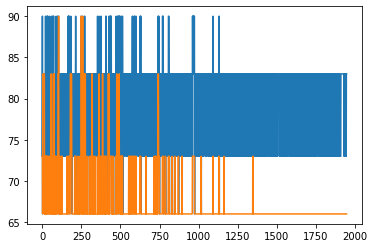

Simulated Annealing algorithm : 
	Total time : 66 hours
	Execution time : 1 s
	Total iterations : 1945
	Best path : [0, 2, 1, 3, 4, 0]
Starts at 8:00 at the node 0
Should arrive to the node 2 at 21:00 if no rest
	Rests between 0 and 2 for 12 hours
	Arrives at 9:00, so he can deliver 
Starts at 9:00 at the node 2
Should arrive to the node 1 at 23:00 if no rest
	Rests between 2 and 1 for 12 hours
	Arrives at 11:00, so he can deliver 
Starts at 11:00 at the node 1
Should arrive to the node 3 at 20:00 if no rest
	Rests at the node : 3
	Rests 12 hours
	Arrives at 8:00, so he can deliver 
Starts at 8:00 at the node 3
Should arrive to the node 4 at 3:00 if no rest
	Rests between 3 and 4 for 12 hours
	Arrives at 15:00, so he can deliver 
Starts at 15:00 at the node 4
Should arrive to the node 0 at 2:00 if no rest
	Rests between 4 and 0 for 12 hours
	Arrives at 14:00, so he can deliver 
Total time with 2 constraints : 126
VS without constraints : 66


In [5]:
# Shortest path (only one time each node)
def simulated_annealingPolyvalent(matrix):
    start_time = time.time()

    # value too high = too many iterations (diversification)
    # for big matrice, raise the temp
    temp = 7

    # intensification
    cooling_rate = 0.001

    # nb iteration
    d = 0

    # nb_city = the matrix dimensions
    global nb_city 
    nb_city = len(matrix)

    # all total time changes during the process
    total_len_history = []

    # total path
    selected = []

    # best path TOPRINT
    path = []

    # create an initial_route
    for i in range(0, nb_city):
        path.append(i)
    path.append(0)

    # Calculate timing for the first path
    timing = path_travel_time(path, matrix)
    total_len_history.append(timing)
    selected.append(timing)

    while temp > 1:

        # randomly swap 2 cities
        new_path = swap_value(copy.copy(path))

        # Calculate the new timing
        new_timing = path_travel_time(new_path, matrix)
        total_len_history.append(new_timing)

        # Compare both timing and new timing
        if math.exp((timing - new_timing) / temp) >= random.uniform(0, 1):
            timing = new_timing
            path = new_path

        selected.append(timing)
        temp = temp * (1 - cooling_rate)
        d = d + 1
        
    plt.plot(total_len_history)
    plt.plot(selected)
    plt.show()

    clock = time.time() - start_time
    
    print("Simulated Annealing algorithm : ")
    print("\tTotal time : %d hours" % timing)
    print("\tExecution time : %d s" %clock)
    print("\tTotal iterations : %d" % d)
    print("\tBest path : %s" %path)
    


    # returns a list with, path, timing, execution time, and all 
    return [path, timing, clock, selected, total_len_history, d]

travel = 12 # time during which a truck can ride
rest = 12 # time the truck needs to rest

def total_time(path, matrix):
    time = x = 0
    # time remaining for a day of work
    time_remaining = travel

    # time during which the city is open to take the delivery from 8 to 20
    # we start the day at 8
    actual_time = 8
    stops = []

    # len - 1 ?
    for i in range(1, len(path)):
        # variable used to store the remaining time to wait before traveling again
        time_remaining_to_node = matrix[x][path[i]]
        # global time between two nodes
        time_between_node = matrix[x][path[i]]

        # true when we reach a node
        reached_node = False
        print('Starts at %d:00 at the node %d' % (actual_time, x))
        actual_time = (actual_time + time_between_node) % 24
        print('Should arrive to the node %d at %d:00 if no rest' % (path[i], actual_time))
        while not reached_node:
            if time_remaining_to_node <= time_remaining:
                time_remaining = time_remaining - time_remaining_to_node
                if time_remaining == 0:
                    stops.append(path[i])
                    print("\tRests at the node : %d" % path[i])
                    time_remaining = travel
                    time = time + rest
                    actual_time = (actual_time + rest) % 24
                    print('\tRests %d hours' % rest)
                time = time + time_between_node
                # actual_time = actual_time + 
                reached_node = True
                # if it's between 8AM or 8PM we can deliver, otherwise : wait
            else:
                # has rested between two points
                time_remaining_to_node = time_remaining_to_node - time_remaining
                stops.append([x, path[i]])
                print("\tRests between %d and %d for %d hours" % (x, path[i], rest))

                # rests 12 hours
                time = time + rest
                actual_time = (actual_time + rest) % 24
                time_remaining = travel
        if 8 <= actual_time <= 20:
            # pass
            print('\tArrives at %d:00, so he can deliver ' % actual_time)
        else:
            # print('\tNOT between 8 and 20, wait %d hour(s)' %actual_time)
            if 0 <= actual_time < 8:
                diff = 8 - actual_time
                time = time + diff 
            else:
                diff = 24 - actual_time + 8 
                time = time + diff
            print("The city %d was closed for %d hour(s)" % (path[i], diff)) 
            actual_time = 8

        x = path[i]
    return time

if __name__ == '__main__':

    nb_city = input("Please enter the number of cities that you want : ")

    # call the function that generates a symmetric matrix
    matrix = random_symmetric_matrix(nb_city)
    datas = simulated_annealingPolyvalent(matrix)
    dataConstraint = total_time(datas[0], matrix)

    print("Total time with 2 constraints : %d" % dataConstraint)
    print("VS without constraints : %d" % datas[1])


<h3>Combinaison des deux</h3>

Nous avons pensé qu'avec les paramètres que nous avons choisi pour le recuit et l'implémentation du 2-OPT, il pourrait être judicieux d'ajouter les deux algorithmes à la suite. Le recuit est plus rapide mais le 2-OPT donne de meilleurs résultats. Voici le code correspondant aux 2-OPT ainsi qu'un main qui compare les résultats de l'exécution d'un recuit, puis d'un 2-OPT, puis des deux combinés.

Please enter the number of cities that you want : 50


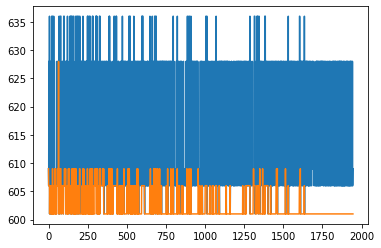

Simulated Annealing algorithm : 
	Total time : 601 hours
	Execution time : 1 s
	Total iterations : 1945
	Best path : [0, 2, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 0]

2-OPT algorithm:
	Total time : 209 hours
	Best path for after 2 algorithms : [0, 47, 20, 17, 18, 38, 29, 21, 42, 11, 33, 32, 40, 30, 43, 48, 41, 9, 24, 7, 5, 4, 3, 22, 6, 36, 25, 19, 45, 39, 8, 1, 2, 46, 26, 34, 37, 13, 16, 23, 44, 28, 15, 35, 27, 12, 10, 14, 31, 49]

Both algorithm combined:
	Total time : 208 hours
	Best path for after 2 algorithms : [0, 47, 25, 6, 36, 13, 33, 11, 26, 29, 38, 18, 17, 20, 48, 43, 30, 40, 32, 2, 46, 1, 8, 39, 45, 19, 3, 22, 24, 37, 34, 41, 9, 23, 4, 5, 7, 16, 42, 21, 49, 31, 14, 10, 12, 44, 28, 15, 35, 27, 0]


In [6]:
def cost_change(cost_mat, n1, n2, n3, n4):
    return cost_mat[n1][n3] + cost_mat[n2][n4] - cost_mat[n1][n2] - cost_mat[n3][n4]

def two_opt(route, cost_mat):

    start_time = time.time()
    best = route
    improved = True
    while improved:
        improved = False
        for i in range(1, len(route) - 2):
            for j in range(i + 1, len(route)):
                if j - i == 1:
                    continue
                if cost_change(cost_mat, best[i - 1], best[i], best[j - 1], best[j]) < 0:
                    best[i:j] = best[j - 1:i - 1:-1]
                    improved = True
        route = best

    # calculate wheight of best route
    route_wheight = x = 0

    for i in range(0, len(best)):
        route_wheight = route_wheight + cost_mat[x][best[i]]
        x = best[i]

    nb_city = len(cost_mat)
    clock = time.time() - start_time

    return [nb_city, clock, route_wheight, best]

if __name__ == '__main__':
    cityNumber = input("Please enter the number of cities that you want : ")
    mat = random_symmetric_matrix(cityNumber)
    datas = simulated_annealingPolyvalent(mat)
    matList = list(mat)
    
    # with a random path
    init_route = list(range(int(cityNumber)))
    bad_route = two_opt(init_route, matList)

    print("\n2-OPT algorithm:")
    print("\tTotal time : %d hours" % bad_route[2])
    print("\tBest path for after 2 algorithms : %s" % bad_route[3])

    # with an optimized path

    best_route = two_opt(datas[0], matList)

    print("\nBoth algorithm combined:")
    print("\tTotal time : %d hours" % best_route[2])
    print("\tBest path for after 2 algorithms : %s" % best_route[3])

On peut effectuer différents tests mais ce que l'on retient c'est :
+ Le recuit (avec les paramètres choisis) a toujours le temps le plus élevé
+ Le 2-OPT seul a toujours un meilleur temps que le recuit mais parfois un plus mauvais temps que les deux combinés.
+ Les deux combinés ont au pire le même temps que le recuit et au mieux un meilleur temps que le 2-OPT

<h2>Statistiques</h2>

Nous avons généré des documents au format CSV contenant nos résultats pour l'algorithme 2-opt et le recuit. Ils contiennent les informations suivantes :
+ Nombre de ville
+ Temps d'exécution
+ Poids total de la solution

Ces informations vont nous permettre d'effectuer des statistiques sur nos algorithmes.

<h3>Comparaison des moyennes de poids total et de temps d'execution</h3>

In [8]:
import pandas

opt_read = pandas.read_csv('Datas/QMG2OPT_datas.csv', sep = ",", dtype={"nbr" : "float64", "tps" : "float64", "pds" : "float64"})
sa_read = pandas.read_csv('Datas/QMGSA_datas.csv', sep = ",", dtype={"nbr" : "float64", "tps" : "float64", "pds" : "float64"})
#print(opt_read)
def average_pds(deg, file):
    nbr=0
    pds=0
    for index, row in file.iterrows():
        if(row[0] == deg):
            pds = pds + row[2]
            nbr +=1
    result = pds/nbr
    return result

def average_tps(deg, file):
    nbr=0
    pds=0
    for index, row in file.iterrows():
        if(row[0] == deg):
            pds = pds + row[1]
            nbr +=1
    result = pds/nbr
    return result


In [9]:
average_pds_5_opt = average_pds(5, opt_read)
average_tps_5_opt = average_tps(5, opt_read)
print("Poids moyen pour 5 villes avec 2-opt :",average_pds_5_opt)
print("Temps moyen pour 5 villes avec 2-opt :",average_tps_5_opt)

average_pds_5_sa = average_pds(5, sa_read)
average_tps_5_sa = average_tps(5, sa_read)
print("Poids moyen pour 5 villes avec recuit :",average_pds_5_sa)
print("Temps moyen pour 5 villes avec recuit :",average_tps_5_sa)

Poids moyen pour 5 villes avec 2-opt : 38.111111111111114
Temps moyen pour 5 villes avec 2-opt : 0.00011144744025336372
Poids moyen pour 5 villes avec recuit : 48.22222222222222
Temps moyen pour 5 villes avec recuit : 0.07967660162183973


In [10]:
average_pds_10_opt = average_pds(10, opt_read)
average_tps_10_opt = average_tps(10, opt_read)
print("Poids moyen pour 10 villes avec 2-opt :",average_pds_10_opt)
print("Temps moyen pour 10 villes avec 2-opt :",average_tps_10_opt)

average_pds_10_sa = average_pds(10, sa_read)
average_tps_10_sa = average_tps(10, sa_read)
print("Poids moyen pour 10 villes avec recuit :",average_pds_10_sa)
print("Temps moyen pour 10 villes avec recuit :",average_tps_10_sa)

Poids moyen pour 10 villes avec 2-opt : 61.22222222222222
Temps moyen pour 10 villes avec 2-opt : 0.00022835201687282987
Poids moyen pour 10 villes avec recuit : 74.22222222222223
Temps moyen pour 10 villes avec recuit : 0.0878787570529514


In [11]:
average_pds_50_opt = average_pds(50, opt_read)
average_tps_50_opt = average_tps(50, opt_read)
print("Poids moyen pour 50 villes avec 2-opt :",average_pds_50_opt)
print("Temps moyen pour 50 villes avec 2-opt :",average_tps_50_opt)

average_pds_50_sa = average_pds(50, sa_read)
average_tps_50_sa = average_tps(50, sa_read)
print("Poids moyen pour 50 villes avec recuit :",average_pds_50_sa)
print("Temps moyen pour 50 villes avec recuit :",average_tps_50_sa)

Poids moyen pour 50 villes avec 2-opt : 221.33333333333334
Temps moyen pour 50 villes avec 2-opt : 0.02095815870496962
Poids moyen pour 50 villes avec recuit : 327.77777777777777
Temps moyen pour 50 villes avec recuit : 0.19459981388515896


In [12]:
average_pds_100_opt = average_pds(100, opt_read)
average_tps_100_opt = average_tps(100, opt_read)
print("Poids moyen pour 100 villes avec 2-opt :",average_pds_100_opt)
print("Temps moyen pour 100 villes avec 2-opt :",average_tps_100_opt)

average_pds_100_sa = average_pds(100, sa_read)
average_tps_100_sa = average_tps(100, sa_read)
print("Poids moyen pour 100 villes avec recuit :",average_pds_100_sa)
print("Temps moyen pour 100 villes avec recuit :",average_tps_100_sa)

Poids moyen pour 100 villes avec 2-opt : 362.1111111111111
Temps moyen pour 100 villes avec 2-opt : 0.0852163897620307
Poids moyen pour 100 villes avec recuit : 659.0
Temps moyen pour 100 villes avec recuit : 0.3030848238203261


In [13]:
average_pds_500_opt = average_pds(500, opt_read)
average_tps_500_opt = average_tps(500, opt_read)
print("Poids moyen pour 500 villes avec 2-opt :",average_pds_500_opt)
print("Temps moyen pour 500 villes avec 2-opt :",average_tps_500_opt)

average_pds_500_sa = average_pds(500, sa_read)
average_tps_500_sa = average_tps(500, sa_read)
print("Poids moyen pour 500 villes avec recuit :",average_pds_500_sa)
print("Temps moyen pour 500 villes avec recuit :",average_tps_500_sa)

Poids moyen pour 500 villes avec 2-opt : 1351.6666666666667
Temps moyen pour 500 villes avec 2-opt : 2.968409538269043
Poids moyen pour 500 villes avec recuit : 3982.3333333333335
Temps moyen pour 500 villes avec recuit : 0.9384040832519531


In [14]:
average_pds_1000_opt = average_pds(1000, opt_read)
average_tps_1000_opt = average_tps(1000, opt_read)
print("Poids moyen pour 1000 villes avec 2-opt :",average_pds_1000_opt)
print("Temps moyen pour 1000 villes avec 2-opt :",average_tps_1000_opt)

average_pds_1000_sa = average_pds(1000, sa_read)
average_tps_1000_sa = average_tps(1000, sa_read)
print("Poids moyen pour 1000 villes avec recuit :",average_pds_1000_sa)
print("Temps moyen pour 1000 villes avec recuit :",average_tps_1000_sa)

Poids moyen pour 1000 villes avec 2-opt : 2467.3333333333335
Temps moyen pour 1000 villes avec 2-opt : 14.055223332511055
Poids moyen pour 1000 villes avec recuit : 8740.0
Temps moyen pour 1000 villes avec recuit : 1.8529801898532443


Après la comparaison des résultats de ces deux algorithmes on remarque donc que malgré nos ressentis concernant le 2-opt n'étant pas optimal pour les petites matrices, on peut constater qu'avec les paramètres choisis pour notre recuit simulé, le 2-opt reste la meilleure option si on veut un meilleur résultat et le recuit plus rapide mais avec un résultat moins proche de là l'optimum global.

<h3>Regression Linéaire</h3>

intercept: 
0.0438446926348135
coef: 
[0.0017844]
RMSE: 
0.17035400851939572


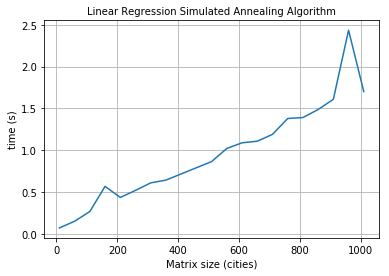

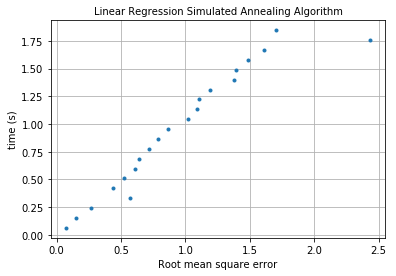

intercept: 
-4.106879662270156
coef: 
[0.02175151]
RMSE: 
2.7095843410978584


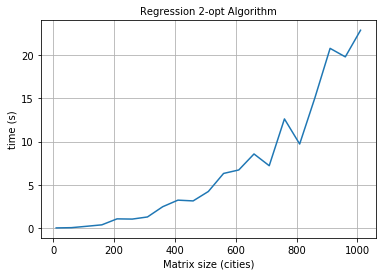

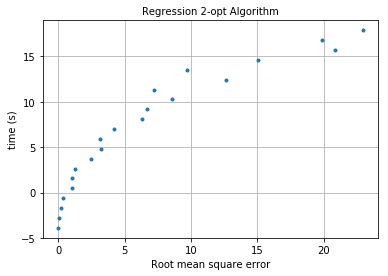

In [14]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
# lib name : scikit-learn

# import LinearRegression.csv
# importe LinearRegression.csv


def regression_2opt():

    data = pd.read_csv('Datas/linearRegression2opt.csv', index_col=0)
    data.head()

    # Create the object Linear regression
    # créer un objet reg lin
    modele_reg = LinearRegression()

    # Create y and X
    # créer y et X
    axes = data.columns.drop("time")
    y = data.time
    x = data[axes]

    modele_reg.fit(x, y)

    print("intercept: ")
    print(modele_reg.intercept_)
    print("coef: ")
    print(modele_reg.coef_)

    # Calculate R²
    # calcul du R²
    modele_reg.score(x, y)

    RMSE = np.sqrt(((y - modele_reg.predict(x)) ** 2).sum() / len(y))
    print("RMSE: ")
    print(RMSE)
    plt.plot(x,y)
    plt.grid()
    plt.title("Regression 2-opt Algorithm", fontsize=10)
    plt.xlabel('Matrix size (cities)')
    plt.ylabel('time (s)')
    plt.show()

    plt.plot(y, modele_reg.predict(x), '.')
    plt.grid()
    plt.title("Regression 2-opt Algorithm", fontsize=10)
    plt.xlabel('Root mean square error')
    plt.ylabel('time (s)')
    plt.show()

    # plt.plot(y, y-modele_reg.predict(x), '.')
    # plt.show()


def regression_sa():

    data = pd.read_csv('Datas/linearRegressionSA.csv', index_col=0)
    data.head()
    # xaxe = pd.read_csv(r'../Datas/linearRegressionSA.csv', usecols=[2], skiprows=1)
    # yaxe = pd.read_csv(r'../Datas/linearRegressionSA.csv', usecols=[2], skiprows=1)
    # xaxes = (list([xaxe]))
    # yaxes = (list([yaxe]))
    #
    # lr = sc.stats.linregress(xaxes, yaxes)

    # fit = np.polyfit(xaxes, yaxes, 1)
    # print(fit)
    #np.polyfit(np.x), y, 1)

    # Create the object Linear regression
    # créer un objet reg lin
    modele_reg = LinearRegression()

    # Create y and X
    # créer y et X
    axes = data.columns.drop("time")
    y = data.time
    x = data[axes]

    modele_reg.fit(x, y)

    print("intercept: ")
    print(modele_reg.intercept_)
    print("coef: ")
    print(modele_reg.coef_)

    # Calculate R²
    # calcul du R² (coefficent de determination(coefficient de correlation²))
    modele_reg.score(x, y)

    #Root Mean Square Error
    RMSE = np.sqrt(((y - modele_reg.predict(x)) ** 2).sum() / len(y))
    print("RMSE: ")
    print(RMSE)
    plt.plot(x,y)
    plt.grid()
    plt.title("Linear Regression Simulated Annealing Algorithm", fontsize=10)
    plt.xlabel('Matrix size (cities)')
    plt.ylabel('time (s)')
    plt.show()

    plt.plot(y, modele_reg.predict(x), '.')
    plt.grid()
    plt.title("Linear Regression Simulated Annealing Algorithm", fontsize=10)
    plt.xlabel('Root mean square error')
    plt.ylabel('time (s)')
    plt.show()


    # plt.plot(y, y - modele_reg.predict(x), '.')
    # plt.show()


regression_sa()
regression_2opt()

La régression linéaire sert principalement à corréler deux variables qui ont une relation plus au moins linéaire et par la technique des moindres carrés à en sortir une droite qui nous servira à prévoir le comportement d’une variable par rapport à la deuxième.<br>
Ici la droite de régression linéaire n’est pas représentée néanmoins nous l’avons calculé pour les deux algorithmes elle est décrite par (y=ax+b) a été le coefficient et b étant l’intercept.<br>
Le R² représente le coefficient de détermination il est compris entre 0 et 1 et nous indique le niveau de confiance qu’on peut avoir en la prédiction, il est le carré du coefficient de corrélation<br>
<br>
Pour conclure les deux algorithmes se comportent différemment, si l’algorithme du recuit simulé est bien plus rapide que le 2-opt il est cependant moins performant car il y a une corrélation linéaire entre le temps de traitement et l’erreur quadratique en revanche le 2-opt suit plutôt une tendance logarithmique quant à l’évolution de l’erreur quadratique par rapport au temps. 
Il est à noter aussi que les routes trouvées par l’algorithme du 2-opt sont bien plus rapide que celles indiqué par le recuit simulé.

<h2>Conclusion</h2>

Pour répondre au problème du VRP nous avons choisi dans un premier temps un algorithme 2-OPT. Après plusieurs essais sur des cas simples, nous avons pensé que le 2-OPT était une bonne option pour résoudre ce problème. Cependant, après plusieurs tests sur des petits nombres de villes, la précision de cet algorithme ne semblait pas optimale et ne semblait pas répondre correctement à nos souhaits.<br>
Pour avoir une meilleure précision et polyvalence entre petit nombre de villes et grand nombre, nous avons choisi, d'implémenter un recuit simulé. Cela nous a permis de faire des statistiques comparatives des deux algorithmes. Suite à ces statistiques, nous avons pu constater qu'avec les paramètres choisis pour notre recuit simulé, le 2-opt restait la meilleure option si nous voulions un meilleur résultat et le recuit sommes plus rapides mais avec un résultat moins proche de là l'optimum global.<br>
Nous nous sommes donc intéressé à implémenter les deux à la suite nous permettant de conclure que au pire les deux l'un à la suite de l'autre ont le même temps que le recuit est au mieux un meilleur temps que le 2-OPT.

Groupe : Gauillaume ROBERT, Mehdi SANSAL, Maxime NEUVILLE